In [39]:
import numpy as np

# Tutorial

In [43]:
# Vocab is all these
a = "Ben Dover was a great footballer for Leicester FC"
b = "we will not allow you to bring your pet armadillo along"
c = "he figured a few sticks of dynamite were easier than a fishing pole to catch fish"

In [44]:

def shingle(text: str, k: int):
    shingle_set = []
    for i in range(len(text) - k+1):
        shingle_set.append(text[i:i+k])
    return set(shingle_set)


In [45]:
x1 = shingle(a, 2)
x2= shingle(b,2)
x3 = shingle(c,2)

In [46]:
# Unioning all the shingles to create a vocab 
vocab = x1.union(x2,x3)

In [47]:
vocab_list= list(vocab) 

In [31]:
len(vocab)

112

In [51]:
vocab # Vocab apparently has to be all possible combinations of 2 letter combinations, not only those apparent:)

{' D',
 ' F',
 ' L',
 ' a',
 ' b',
 ' c',
 ' d',
 ' e',
 ' f',
 ' g',
 ' n',
 ' o',
 ' p',
 ' s',
 ' t',
 ' w',
 ' y',
 'Be',
 'Do',
 'FC',
 'Le',
 'a ',
 'ad',
 'al',
 'am',
 'an',
 'ar',
 'as',
 'at',
 'ba',
 'br',
 'ca',
 'ce',
 'ch',
 'ck',
 'd ',
 'di',
 'dy',
 'e ',
 'ea',
 'ed',
 'ei',
 'en',
 'er',
 'es',
 'et',
 'ew',
 'f ',
 'fe',
 'fi',
 'fo',
 'g ',
 'gr',
 'gu',
 'h ',
 'ha',
 'he',
 'hi',
 'ic',
 'ie',
 'ig',
 'il',
 'in',
 'is',
 'it',
 'ks',
 'l ',
 'le',
 'll',
 'lo',
 'ma',
 'mi',
 'n ',
 'na',
 'ng',
 'no',
 'o ',
 'of',
 'ol',
 'on',
 'oo',
 'or',
 'ot',
 'ou',
 'ov',
 'ow',
 'pe',
 'po',
 'r ',
 're',
 'ri',
 'rm',
 's ',
 'sh',
 'si',
 'st',
 't ',
 'tb',
 'tc',
 'te',
 'th',
 'ti',
 'to',
 'u ',
 'ur',
 've',
 'w ',
 'wa',
 'we',
 'wi',
 'yn',
 'yo'}

In [48]:
# Function to create sparse vector representation
def create_sparse_vector(shingle_set, vocab_list):
    # Create a zero vector with the length of the vocabulary
    vector = np.zeros(len(vocab_list), dtype=int)
    
    # Create a mapping from shingle to index
    shingle_to_index = {shingle: idx for idx, shingle in enumerate(vocab_list)}
    
    # Set positions corresponding to the shingles in the set to 1
    for shingle in shingle_set:
        if shingle in shingle_to_index:
            index = shingle_to_index[shingle]
            vector[index] = 1
            
    return vector

# Create sparse vectors for each set of shingles
sparse_vector_a = create_sparse_vector(x1, vocab)
sparse_vector_b = create_sparse_vector(x2, vocab)
sparse_vector_c = create_sparse_vector(x3, vocab)

# Print the results
print('Vocabulary List:', vocab)
print('Sparse Vector for Set A:', sparse_vector_a)
print('Sparse Vector for Set B:', sparse_vector_b)
print('Sparse Vector for Set C:', sparse_vector_c)

Vocabulary List: {'en', 'to', 'o ', 'h ', 'n ', 'of', 'wi', ' D', 'ei', 'an', 'tc', 'es', 'on', 'or', 'ol', 'am', 'ot', 'Do', 'ed', ' F', 'Be', ' f', 'mi', 'w ', 'il', ' w', 'u ', ' c', 'ie', 'dy', 'wa', 'na', 'no', 'yo', 'br', 'e ', 'ba', 'ea', 'ma', 'yn', ' d', 'si', 'gr', 'oo', ' e', 'll', 'he', 'po', 'ck', 'r ', 'ng', ' L', 'd ', 'fe', 'ur', 'is', 'ad', 'ti', 've', ' n', 'er', 'hi', 'th', 'FC', 'di', 'fo', 'gu', ' s', 'ov', 'lo', 'as', 'st', ' b', ' a', 'pe', ' y', 'et', 'sh', ' t', 'in', ' p', 'fi', 'te', 'ow', 'we', 'ew', 'ca', ' g', 'f ', 's ', 'tb', 'g ', 'ha', 'l ', ' o', 'ou', 'it', 'ic', 'ch', 're', 't ', 'ar', 'ce', 'Le', 'at', 'ri', 'rm', 'ks', 'a ', 'ig', 'le', 'al'}
Sparse Vector for Set A: [1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1
 1]
Sparse Vector for Set B: [0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 

In [50]:
len(sparse_vector_a)

112

In [41]:
# Convert vocabulary to a list and create a mapping from shingle to index
vocab_list = sorted(vocab)  # Sorted to maintain a consistent order
shingle_to_index = {shingle: idx for idx, shingle in enumerate(vocab_list)}

# Create a zero vector
zero_vector = np.zeros(len(vocab), dtype=int)

# Create a one-hot encoding vector
one_hot_vector = zero_vector.copy()  # Start with a zero vector
document_shingles = [x,x1,x2]
for shingle in document_shingles:
    if shingle in shingle_to_index:
        index = shingle_to_index[shingle]
        one_hot_vector[index] = 1

# Print the results
print('Vocabulary List:', vocab_list)
print('Zero Vector:', zero_vector)
print('One-Hot Encoding Vector:', one_hot_vector)

TypeError: unhashable type: 'set'

In [33]:
hash_ex = list(range(1, len(vocab)+1))
print(hash_ex)  # we haven't shuffled yet

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]


In [34]:
from random import shuffle

shuffle(hash_ex)
print(hash_ex)

[7, 4, 48, 40, 108, 58, 39, 107, 93, 55, 111, 44, 72, 66, 5, 18, 85, 83, 95, 80, 90, 77, 78, 99, 68, 74, 59, 87, 6, 91, 65, 41, 33, 50, 19, 54, 61, 9, 53, 76, 64, 11, 32, 34, 17, 16, 101, 1, 22, 73, 27, 31, 63, 67, 37, 81, 25, 102, 56, 51, 47, 84, 86, 57, 69, 62, 71, 20, 38, 75, 110, 70, 92, 42, 109, 46, 12, 105, 28, 100, 112, 10, 52, 2, 23, 104, 24, 13, 21, 88, 106, 29, 36, 35, 3, 49, 79, 103, 43, 96, 26, 94, 45, 82, 14, 30, 60, 98, 97, 15, 89, 8]


In [36]:
print(f"7 -> {hash_ex.index(7)}") # note that value 7 can be found at index 1 in hash_ex

7 -> 0


In [37]:
for i in range(1, 5):
    print(f"{i} -> {hash_ex.index(i)}")

1 -> 47
2 -> 83
3 -> 94
4 -> 1


In [38]:
for i in range(1, len(vocab)+1):
    idx = hash_ex.index(i)
    signature_val = a_1hot[idx]
    print(f"{i} -> {idx} -> {signature_val}")
    if signature_val == 1:
        print('match!')
        break

NameError: name 'a_1hot' is not defined

In [ ]:
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes of the datasets
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

# Nearest Neighbor approach

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()



In [3]:
image_paths = [r"C:\Users\Test\Desktop\train pictures\Bengal-Tiger-1-2394098139.jpg",r"C:\Users\Test\Desktop\train pictures\50491001_kupidw-4236205023.png",r"C:\Users\Test\Desktop\train pictures\standard_compressed_shutterstock_431261209-2355040252.jpg",r"C:\Users\Test\Desktop\train pictures\20240906_202800.jpg", r"C:\Users\Test\Desktop\train pictures\20240906_202800thg.jpg"]

In [4]:
from sklearn.neighbors import NearestNeighbors


In [5]:
from PIL import Image

# Test loading an image
img = Image.open(r"C:\Users\Test\Desktop\train pictures\IMG_3586.jpg")
img.show()  # This should display the image


In [7]:

# Example feature matrix where each row is a feature vector of an image
features = np.array([extract_features(img_path) for img_path in image_paths])

# Initialize NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(features)

def find_nearest_neighbors(query_img_path, nbrs):
    query_features = extract_features(query_img_path).reshape(1, -1)
    distances, indices = nbrs.kneighbors(query_features)
    return indices, distances

# Example usage
query_img_path =r"C:\Users\Test\Desktop\train pictures\IMG_3586.jpg"
indices, distances = find_nearest_neighbors(query_img_path, nbrs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [8]:
distances

array([[1645.95400915, 1676.56474857, 2615.00667828, 3567.52927847,
        3574.99075392]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


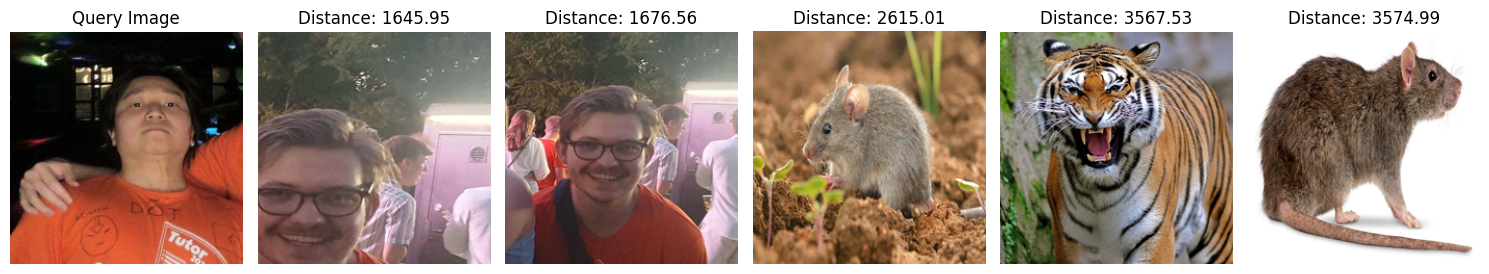

In [9]:

# Function to load images from file paths
def load_image(img_path, size=(224, 224)):
    img = Image.open(img_path)
    img = img.resize(size)
    return np.array(img)

# List of image paths (update these paths to your images)

# Example query image path


# Find nearest neighbors (assuming you have computed these)
indices, distances = find_nearest_neighbors(query_img_path, nbrs)

# Load query image
query_image = load_image(query_img_path)

# Plot
fig, axes = plt.subplots(1, len(indices[0]) + 1, figsize=(15, 5))

# Plot query image
axes[0].imshow(query_image)
axes[0].set_title('Query Image')
axes[0].axis('off')

# Plot nearest neighbors
for i, idx in enumerate(indices[0]):
    neighbor_image = load_image(image_paths[idx])
    axes[i + 1].imshow(neighbor_image)
    axes[i + 1].set_title(f'Distance: {distances[0][i]:.2f}')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()